#                                               ASSIGNMENT DETAILS

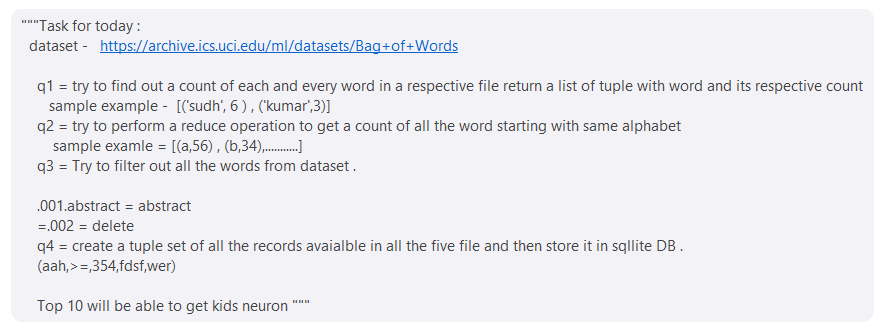

## Import all required libraries and declare logging

In [4]:
# Importing all libraries required for the project
try:
    import string
    import logging
    import sqlite3 as sql
    import glob
    
except ModuleNotFoundError:
    print("Please pip install necessary modules")

logging.basicConfig(
                    filename = "file_preprocess.log", 
                    filemode = "a",
                    format='%(asctime)s %(message)s',
                    datefmt='%m/%d/%Y %I:%M:%S %p',
                    level = "DEBUG"
                        )

## Get all files that start with name "vocab" from the directory

In [5]:
def _prepare_files():
    '''This function will pass valid filenames from a directory to be appended into a single file
    Function will return a list of all files in the directory'''
    
    lst = []
    
    try:
        for file in glob.glob("vocab*"):
            lst.append(file)
            
        return lst
    
    except Exception as e:
        print(e)
        logging.error("Error while searching for files")

In [6]:
words = _prepare_files()

### Check to see if all files are identified or not

In [84]:
words

['vocab.enron.txt',
 'vocab.kos.txt',
 'vocab.nips.txt',
 'vocab.nytimes.txt',
 'vocab.pubmed.txt']

## Create a function that will do text preprocessing by removing all punctuations and digits from words

In [7]:
def _extract_words(words):
    '''This function will extract words from a file after removing all punctuations and digits'''
    '''It will return a list of cleaned words and a boolean variable = True if no errors happened during the conversion'''
    
    # Create an empty list that will hold all processed words
    new_list = []
    
    
    try:
        
        with open(filename, "r", encoding = "utf-8") as file:  # Read contents of the file
            text = file.read()
            words = text.split()                                 # split into words by white space
            
        # Use the maketrans() function to remove punctuations from valid words
        # Example: ">=0.02.abstract" should become "0.02.abstract"
        
        table = str.maketrans('', '', string.punctuation)  
        stripped = [w.translate(table) for w in words]
        
        # Now remove all digits from the valid words
        # Example: "0.02.abstract" should become "abstract"
        new_list = []

        for element in stripped:
            result = ''.join([i for i in element if not i.isdigit()])
            new_list.append(result)
        
        return (new_list,True)
    
    except Exception as e:
        print(e)
        logging.error("Error happened while reading file")
        
        return (new_list,False)

## Create a function to write all preprocessed files to a single file

In [8]:
def _combine_words(filename,words):
    '''This function will write all pre processed words into a single file'''
    
    '''Arguments: filename = new file where all cleaned words are appended
                      words = list of cleaned words received from _extract_words function'''
    
    try:
        with open(filename, "a", encoding = "utf-8") as file:
            for element in words:
                file.write(element+"\n")
        logging.info("File write successfull")
                     
    except Exception as e:
        print(e)
        logging.error("Error happened while writing to file")

## The below code will go through each file in the directory and write the contents into a single file using above 3 functions

In [26]:
newfile = "bag_of_words.txt"

try:
    
    for filename in words:
        catch,bool = _extract_words(filename)            # Call the _extract_words function to create list of words from each file
        if bool == True:
            _combine_words(newfile,catch)                  # For non-empty files, write into a single file "bag_of_words" using "_combine_words" function
    
    logging.info("File "+ newfile + "successfully prepared")

except Exception as e:
    print(e)
    logging.error("Error while writing to single file")
    

### After the above operation "bag_of_words" is created. Size of file indicates it has combined all words from all 5 files

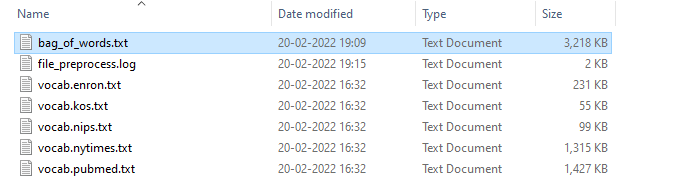

## Create a class to do file operations

In [10]:
class _operations:
    
    def __init__(self,file):
        '''Constructor Class'''
        
        self.file = file
        
    
    
    def _display(self,d):
        '''This function uses zip function to convert a dictionary items to a tuple'''
        
        # Convert the dictionary to a list of tuples for display using the ZIP function
        display = list(zip(d.keys(),d.values()))
            
        return display
                
    
    
    def _word_count(self):
        '''This function will count number of occurences of each distinct word in a file'''
        '''This function will use the zip() method'''
        
        try:
            with open(self.file, "r",  encoding = "utf-8") as f:
                text = f.read()
                words = text.split()                                 # split into words by white space
            
                unique = set(words)                                # Creates a set of unique elements so we dont get repetative counts for an element
                d = {}
                       
                # Iterate through each individual word in the list and create a dictionary of tuples
                for word in unique:
                    d[word] = words.count(word)
                
                logging.info("Word count gathered successfully!!!")
                
                return self._display(d)                              # Call the _display function inside the class and pass the dictionary as argument
        
        except Exception as e:
            print(e)
            logging.error("Error while reading file")
            
        
    
    
    def _alpha_count(self):
        '''Function to return count of words starting with an alphabet'''
        
        try:
            #Generate a list of all alphabets in lowercase
            alpha_list = list(string.ascii_lowercase)
            
            with open(self.file, "r",  encoding = "utf-8") as f:
                text = f.read()
                words = text.split()                                 # split into words by white space
            
            d = {}
            
            for alphabet in alpha_list:
                count = 0
                for word in words:
                    if word.startswith(alphabet):
                        count += 1
                d[alphabet] = count
            
            logging.info("Alphabet count gathered successfully")
            
            return self._display(d)                              # Call the _display function inside the class and pass the dictionary as argument
            
        except Exception as e:
            print(e)
            logging.error("Error while reading file")
    


### Create an object of the class _operations

In [27]:
obj = _operations("bag_of_words.txt")

### Call the _word_count instance method and print the results in the required format

In [23]:
word_count = obj._word_count()

### Below is a screenshot of the word count. For brevity, I have printed only 10 records from the word count

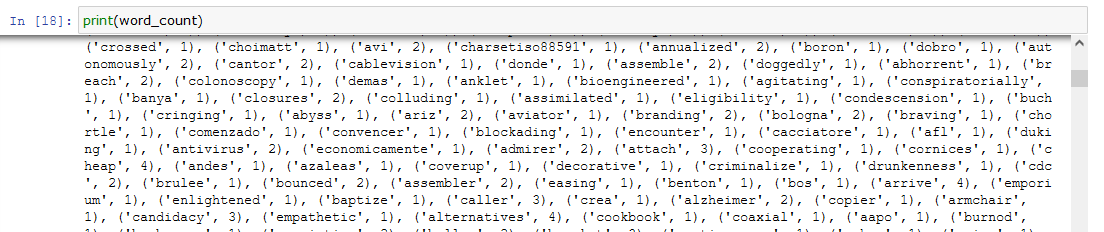

### Sample 10 records

In [24]:
print(word_count[:10])

[('devoting', 4), ('avowal', 2), ('consul', 2), ('area', 9), ('decorated', 5), ('eloquent', 3), ('ambiguously', 3), ('abramowicz', 2), ('amusingly', 2), ('agreed', 9)]


### Call the _alpha_count instance method and print the results in the required format

In [28]:
alpha_count = obj._alpha_count()

### Pritn alphabet wise count of all records

In [31]:
print("******Alphabet wise count of words*******")
print("\n")

for element in alpha_count:
    print(element)

******Alphabet wise count of words*******


('a', 16922)
('b', 10703)
('c', 21704)
('d', 12826)
('e', 10099)
('f', 8705)
('g', 7199)
('h', 10365)
('i', 10168)
('j', 1574)
('k', 2831)
('l', 8023)
('m', 14937)
('n', 9297)
('o', 5805)
('p', 20397)
('q', 1797)
('r', 11715)
('s', 21006)
('t', 11754)
('u', 4539)
('v', 3844)
('w', 3876)
('x', 508)
('y', 814)
('z', 58847)


## Perform sqlite operations on the data

## Create a SQLlite3 table and insert tuple set of all records into the table

In [299]:
import sqlite3 as sql


class _sql_op():
    
    def __init__(self,mydb,tbl):
        '''Constructor Class'''
        
        self.mydb = mydb
        self.tbl = tbl
        
    def _prepare_insert(self):
        
    
        lst = []
    
        with  open("vocab.pubmed.txt", "r", encoding = "utf-8") as f1, open("vocab.nytimes.txt", "r", encoding = "utf-8") as f2, open("vocab.nips.txt", "r", encoding = "utf-8") as f3, open("vocab.kos.txt", "r", encoding = "utf-8") as f4, open("vocab.enron.txt", "r", encoding = "utf-8") as f5:
            line_file1 = f1.read().splitlines()
            line_file2 = f2.read().splitlines()
            line_file3 = f3.read().splitlines()
            line_file4 = f4.read().splitlines()
            line_file5 = f5.read().splitlines()
        
            result = list(zip(line_file1,line_file2,line_file3,line_file4,line_file5))
        
        for each in result:
            lst.append("INSERT INTO " + self.tbl + " VALUES " + str(each))
        
        return lst
        
    def _table_operation(self):
        '''Creates a database in sql db'''
        
        try:
            conn = sql.connect(self.mydb)
            print("Database created successfully")
            logging.info("Database created successfully")
            
            # Create cursor for table operations
            cursor = conn.cursor()
            
            create_sql = "CREATE TABLE IF NOT EXISTS " + self.tbl + "(Col_1 text, Col_2 text, Col_3 text, Col_4 text, Col_5 text)"
            cursor.execute(create_sql)
            
            print("Table created successfully")
            logging.info("Table created successfully")
            
            catch = self._prepare_insert()
            for i in catch:
                cursor.execute(i)
                conn.commit()
            
            sel_sql = "SELECT * FROM " + self.tbl
            cursor.execute(sel_sql)
            rows = cursor.fetchall()
            
            return rows
        
        except Exception as e:
            print(e)
            logging.error("Error occured while doing table operation")
            
        finally:
            cursor.close()

### Create an object of the class

In [300]:
sql_obj = _sql_op("mydb","mytbl")

In [302]:
rows = sql_obj._table_operation()

for i in rows:
    print(i)

Database created successfully
Table created successfully
('aah', 'abated', 'a2i', 'aarp', 'aaa')
('aahed', 'abatement', 'aaa', 'abandon', 'aaas')
('aaron', 'abating', 'aaai', 'abandoned', 'aactive')
('aback', 'abbey', 'aapo', 'abandoning', 'aadvantage')
('abacus', 'abbot', 'aat', 'abb', 'aaker')
('abajo', 'abbreviated', 'aazhang', 'abc', 'aap')
('abalone', 'abbreviation', 'abandonment', 'abcs', 'aapg')
('abandon', 'abc', 'abbott', 'abdullah', 'aaron')
('abandoned', 'abcnew', 'abbreviated', 'ability', 'aarp')
('abandoning', 'abdicate', 'abcde', 'aboard', 'aas')
('aah', 'abated', 'a2i', 'aarp', 'aaa')
('aahed', 'abatement', 'aaa', 'abandon', 'aaas')
('aaron', 'abating', 'aaai', 'abandoned', 'aactive')
('aback', 'abbey', 'aapo', 'abandoning', 'aadvantage')
('abacus', 'abbot', 'aat', 'abb', 'aaker')
('abajo', 'abbreviated', 'aazhang', 'abc', 'aap')
('abalone', 'abbreviation', 'abandonment', 'abcs', 'aapg')
('abandon', 'abc', 'abbott', 'abdullah', 'aaron')
('abandoned', 'abcnew', 'abbreviat